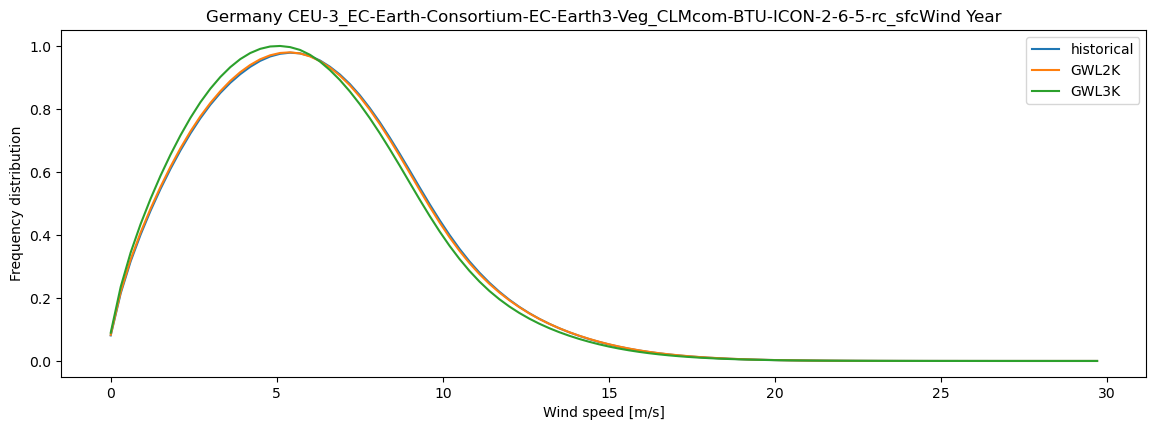

In [ ]:
# sfcWind speed histogram
import json

import matplotlib.pyplot as plt
import numpy as np

region = "Germany"
with open(f"sfcWind/{region}.json", "r", encoding="utf-8") as file:
    wind_stats = json.load(file)
    dataset = "CEU-3_EC-Earth-Consortium-EC-Earth3-Veg_CLMcom-BTU-ICON-2-6-5-rc_sfcWind"
    Hereon_data = wind_stats[dataset]
    edges = wind_stats["edges"]
    wind_hist = Hereon_data["historical"]
    wind_2K = Hereon_data["ssp370-GWL2K"]
    wind_3K = Hereon_data["ssp370-GWL3K"]

    season = "Year"
    max_count = max(wind_hist[season]["counts"] + wind_2K[season]["counts"] + wind_3K[season]["counts"])
    plt.figure(figsize=(14, 4.5))
    labels = ["historical", "GWL2K", "GWL3K"]
    for index, data in enumerate([wind_hist, wind_2K, wind_3K]):
        plt.plot(edges[:-1], np.array(data[season]["counts"]) / max_count, label=labels[index])
        #plt.stairs(data["counts"], edges,label=labels[index])
    plt.title(f"{region} {dataset} {season}")
    plt.ylabel("Frequency distribution")
    plt.xlabel("Wind speed [m/s]")
    plt.legend()
    plt.show()

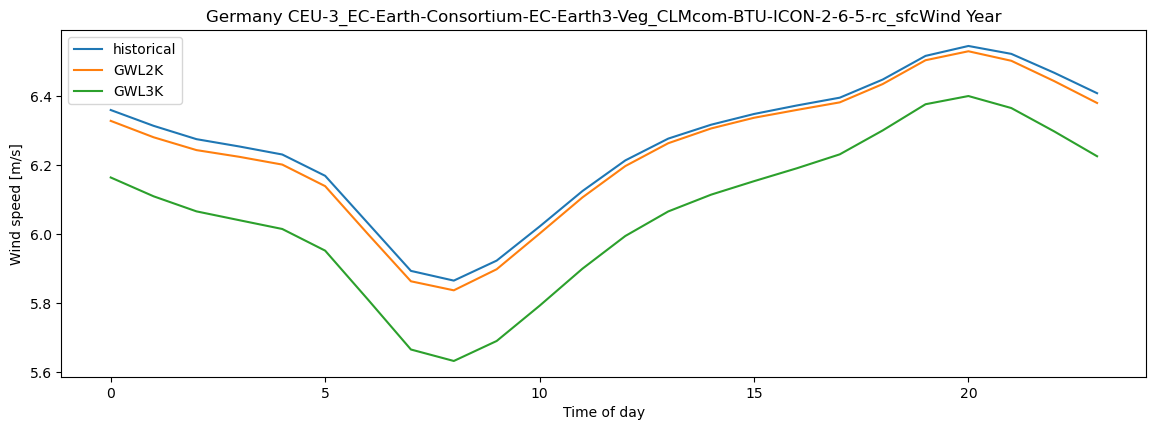

In [ ]:
# Wind speed daily cycle
import json
import matplotlib.pyplot as plt

region = "Germany"
with open(f"sfcWind/{region}.json", "r", encoding="utf-8") as file:
    wind_stats = json.load(file)
    dataset = "CEU-3_EC-Earth-Consortium-EC-Earth3-Veg_CLMcom-BTU-ICON-2-6-5-rc_sfcWind"
    Hereon_data = wind_stats[dataset]
    wind_hist = Hereon_data["historical"]
    wind_2K = Hereon_data["ssp370-GWL2K"]
    wind_3K = Hereon_data["ssp370-GWL3K"]
    season = "Year"
    plt.figure(figsize=(14, 4.5))
    labels = ["historical", "GWL2K", "GWL3K"]
    for index, data in enumerate([wind_hist, wind_2K, wind_3K]):
        plt.plot(data[season]["diurnal_cycle"], label=labels[index])

    plt.title(f"{region} {dataset} {season}")
    plt.ylabel("Wind speed [m/s]")
    plt.xlabel("Time of day")
    plt.legend()
    plt.show()

In [ ]:
#Mean wind speed changes table
import json

from collections import defaultdict

# Load wind statistics from JSON file
with open("sfcWind/Germany.json", "r", encoding="utf-8") as file:
    wind_stats = json.load(file)

# Define scenarios and season of interest
wanted_scenarios = ["historical", "ssp370-GWL2K", "ssp370-GWL3K"]
season = "Year"

# Prepare data containers
dataset_names = []
scenario_means = {scenario: [] for scenario in wanted_scenarios}
data = f""
# Extract data
for dataset_name, dataset in wind_stats.items():
    if dataset_name == "edges":
        continue
    if all(scenario in dataset for scenario in wanted_scenarios):
        dataset_names.append(dataset_name)
        for scenario in wanted_scenarios:
            mean_value = dataset[scenario][season]["mean"]
            data += f"{dataset_name} {scenario}:{mean_value:.2f}\n"

entries = []
for line in data.strip().split('\n'):
    full_id, value = line.split(':')
    parts = full_id.split('_')
    resolution = parts[0]
    gcm = parts[1]
    rcm = parts[2].split('-')[0]  # Simplify RCM name
    scenario = parts[-1]
    entries.append((resolution, gcm, rcm, scenario, value))

# Group data for multirow
grouped = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))
for res, gcm, rcm, scenario, value in entries:
    grouped[res][gcm][rcm].append((scenario, value))

# Generate LaTeX
latex = [
    "\\begin{table}[htbp]",
    "\\centering",
    "\\begin{tabular}{lll|l|l}",
    "\\hline",
    "\\textbf{Resolution} & \\textbf{GCM} & \\textbf{RCM} & \\textbf{Scenario} & \\textbf{Value} \\\\",
    "\\hline"
]

for res, gcm_dict in grouped.items():
    for gcm, rcm_dict in gcm_dict.items():
        total_rows = sum(len(v) for v in rcm_dict.values())
        res_rowspan = f"\\multirow{{{total_rows}}}{{*}}{{{res}}}"
        gcm_rowspan = f"\\multirow{{{total_rows}}}{{*}}{{{gcm}}}"
        first_res = True
        first_gcm = True
        for rcm, scenarios in rcm_dict.items():
            rcm_rowspan = f"\\multirow{{{len(scenarios)}}}{{*}}{{{rcm}}}"
            first_rcm = True
            for scenario, value in scenarios:
                row = []
                if first_res:
                    row.append(res_rowspan)
                    first_res = False
                else:
                    row.append("")

                if first_gcm:
                    row.append(gcm_rowspan)
                    first_gcm = False
                else:
                    row.append("")

                if first_rcm:
                    row.append(rcm_rowspan)
                    first_rcm = False
                else:
                    row.append("")

                row.extend([scenario, value])
                latex.append(" & ".join(row) + " \\\\")
        latex.append("\\hline")

latex.extend([
    "\\end{tabular}",
    "\\caption{Wind speed values grouped by Resolution, GCM, RCM, and Scenario}",
    "\\end{table}"
])

# Output LaTeX code
print("\n".join(latex))


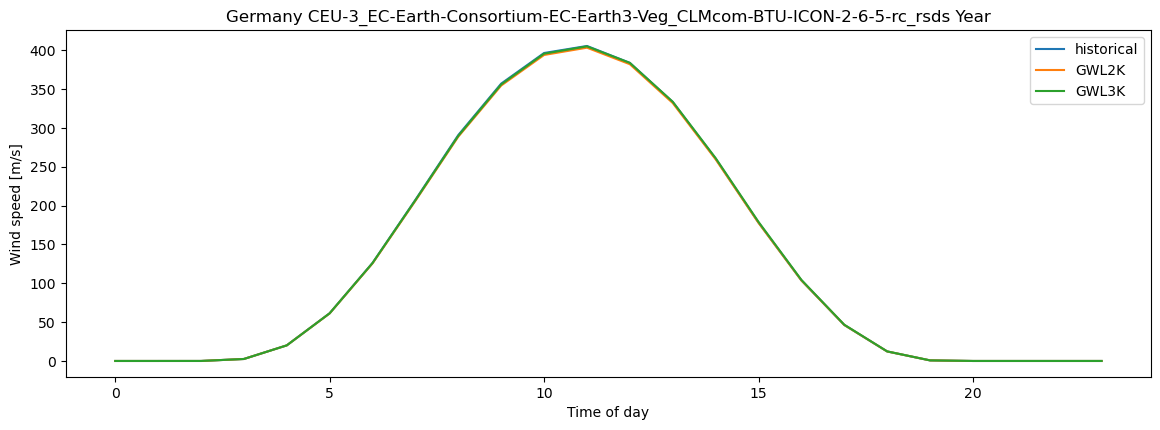

In [2]:
# PV daily cycle
import json
import matplotlib.pyplot as plt

region = "Germany"
with open(f"rsds/{region}.json", "r", encoding="utf-8") as file:
    wind_stats = json.load(file)
    dataset = "CEU-3_EC-Earth-Consortium-EC-Earth3-Veg_CLMcom-BTU-ICON-2-6-5-rc_rsds"
    Hereon_data = wind_stats[dataset]
    wind_2K = Hereon_data["ssp370-GWL2K"]
    wind_3K = Hereon_data["ssp370-GWL3K"]
    season = "Year"
    plt.figure(figsize=(14, 4.5))
    labels = ["historical", "GWL2K", "GWL3K"]
    wind_hist = Hereon_data["historical"]
    for index, data in enumerate([wind_hist, wind_2K, wind_3K]):
        plt.plot(data[season]["diurnal_cycle"], label=labels[index])

    plt.title(f"{region} {dataset} {season}")
    plt.ylabel("Wind speed [m/s]")
    plt.xlabel("Time of day")
    plt.legend()
    plt.show()